# Customer Churn Prediction Using Artificial Neural Network (ANN)

**Introduction to Customer Churn Prediction Using Artificial Neural Network (ANN)**

In today's competitive business landscape, understanding and predicting customer behavior is paramount for companies striving to maintain a loyal customer base. Customer churn, the phenomenon where customers cease their relationship with a business, can significantly impact a company's revenue and growth trajectory. To mitigate churn and retain valuable customers, businesses turn to predictive analytics techniques, such as Artificial Neural Networks (ANN), to forecast potential churners.

The Customer Churn Prediction Using Artificial Neural Network (ANN) dataset serves as a valuable resource for data scientists, analysts, and businesses aiming to develop robust churn prediction models. This dataset encompasses various features that can influence customer churn, including demographic information, customer interactions, usage patterns, and service subscription details.

**Dataset Information:**

- **Data Source**: The dataset is sourced from https://www.kaggle.com/datasets/blastchar/telco-customer-churn.
- **Features**: The dataset comprises a diverse range of features, including but not limited to:
  - Customer demographics: age, gender, location, etc.
  - Service subscription details: subscription type, tenure, plan features, etc.
  - Customer interactions: call duration, frequency of interactions, complaints raised, etc.
  - Usage patterns: data usage, service utilization, etc.
- **Target Variable**: The target variable is typically a binary indicator representing whether a customer churned or not within a defined period.
- **Size**: The dataset contains **7043** records and **21** features.
- **Data Format**: The data is typically provided in CSV format, facilitating easy importation into analytical tools such as Jupyter Notebook.
- **Objective**: The primary objective of utilizing this dataset is to develop a predictive model using Artificial Neural Networks (ANN) to forecast customer churn accurately. By leveraging historical data and advanced machine learning techniques, businesses can proactively identify customers at risk of churn and implement targeted retention strategies.

**Usage in Jupyter Notebook:**

In a Jupyter Notebook environment, data scientists and analysts can leverage this dataset to perform various tasks, including but not limited to:

1. **Data Exploration**: Explore the dataset to understand the distribution of features, identify patterns, and detect any anomalies or inconsistencies.
2. **Data Preprocessing**: Preprocess the data by handling missing values, encoding categorical variables, and scaling numerical features to prepare it for model training.
3. **Model Development**: Utilize Artificial Neural Networks (ANN) to build a predictive churn model. Experiment with different architectures, activation functions, and optimization algorithms to enhance model performance.
4. **Model Evaluation**: Evaluate the performance of the churn prediction model using appropriate metrics such as accuracy, precision, recall, and F1-score. Employ techniques such as cross-validation to ensure the model's robustness.
5. **Deployment**: Once satisfied with the model's performance, deploy it to production environments where it can generate actionable insights to support churn mitigation strategies.

By harnessing the power of data and advanced analytics techniques within Jupyter Notebook, businesses can gain valuable insights into customer churn dynamics and devise proactive measures to retain customers and foster long-term loyalty.

### Importing required modules 

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

### Load the data

In [2]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.sample(5)

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
4132  6834-NXDCA  Female              0      No         No      13   
5604  9432-VOFYX    Male              0      No         No      17   
20    8779-QRDMV    Male              1      No         No       1   
3033  5795-KTGUD  Female              0     Yes         No      68   
3870  1099-BTKWT  Female              0     Yes         No      68   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
4132           No  No phone service             DSL             No  ...   
5604          Yes                No     Fiber optic             No  ...   
20             No  No phone service             DSL             No  ...   
3033          Yes               Yes     Fiber optic            Yes  ...   
3870           No  No phone service             DSL            Yes  ...   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
4132               No          No          No              No  Month-to-month   
5604               No          No          No              No  Month-to-month   
20                Yes          No          No             Yes  Month-to-month   
3033              Yes          No         Yes             Yes        Two year   
3870              Yes          No         Yes             Yes        One year   

     PaperlessBilling              PaymentMethod MonthlyCharges  TotalCharges  \
4132              Yes           Electronic check          23.90         300.8   
5604              Yes           Electronic check          70.80          1207   
20                Yes           Electronic check          39.65         39.65   
3033              Yes  Bank transfer (automatic)         110.80        7553.6   
3870              Yes           Electronic check          54.40       3723.65   

     Churn  
4132   Yes  
5604    No  
20     Yes  
3033    No  
3870    No  

[5 rows x 21 columns]

### First of all, drop customerID column as it is of no use

In [3]:
df.drop('customerID',axis='columns',inplace=True)
df

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0     Female              0     Yes         No       1           No   
1       Male              0      No         No      34          Yes   
2       Male              0      No         No       2          Yes   
3       Male              0      No         No      45           No   
4     Female              0      No         No       2          Yes   
...      ...            ...     ...        ...     ...          ...   
7038    Male              0     Yes        Yes      24          Yes   
7039  Female              0     Yes        Yes      72          Yes   
7040  Female              0     Yes        Yes      11           No   
7041    Male              1     Yes         No       4          Yes   
7042    Male              0      No         No      66          Yes   

         MultipleLines InternetService OnlineSecurity OnlineBackup  \
0     No phone service             DSL             No          Yes   
1                   No             DSL            Yes           No   
2                   No             DSL            Yes          Yes   
3     No phone service             DSL            Yes           No   
4                   No     Fiber optic             No           No   
...                ...             ...            ...          ...   
7038               Yes             DSL            Yes           No   
7039               Yes     Fiber optic             No          Yes   
7040  No phone service             DSL            Yes           No   
7041               Yes     Fiber optic             No           No   
7042                No     Fiber optic            Yes           No   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0                  No          No          No              No  Month-to-month   
1                 Yes          No          No              No        One year   
2                  No          No          No              No  Month-to-month   
3                 Yes         Yes          No              No        One year   
4                  No          No          No              No  Month-to-month   
...               ...         ...         ...             ...             ...   
7038              Yes         Yes         Yes             Yes        One year   
7039              Yes          No         Yes             Yes        One year   
7040               No          No          No              No  Month-to-month   
7041               No          No          No              No  Month-to-month   
7042              Yes         Yes         Yes             Yes        Two year   

     PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges  \
0                 Yes           Electronic check           29.85        29.85   
1                  No               Mailed check           56.95       1889.5   
2                 Yes               Mailed check           53.85       108.15   
3                  No  Bank transfer (automatic)           42.30      1840.75   
4                 Yes           Electronic check           70.70       151.65   
...               ...                        ...             ...          ...   
7038              Yes               Mailed check           84.80       1990.5   
7039              Yes    Credit card (automatic)          103.20       7362.9   
7040              Yes           Electronic check           29.60       346.45   
7041              Yes               Mailed check           74.40        306.6   
7042              Yes  Bank transfer (automatic)          105.65       6844.5   

     Churn  
0       No  
1       No  
2      Yes  
3       No  
4      Yes  
...    ...  
7038    No  
7039    No  
7040    No  
7041   Yes  
7042    No  

[7043 rows x 20 columns]

In [4]:
df.dtypes


gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

#### datatype of TotalCharges should be float but it is an object. Let's conver it to numeric

In [5]:
df.TotalCharges.values   #as it is string type we should convert it to numeric type.


array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [6]:
pd.to_numeric(df.TotalCharges)

ValueError: Unable to parse string " " at position 488

**keyNote:** 
* as some values of TotalCharges contains the blank space so we cannot convert it directly into numeric.
* to convert it in numeric first we should remove the records contaning blank value in TotalCharges.

In [7]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]


gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
488   Female              0     Yes        Yes       0           No   
753     Male              0      No        Yes       0          Yes   
936   Female              0     Yes        Yes       0          Yes   
1082    Male              0     Yes        Yes       0          Yes   
1340  Female              0     Yes        Yes       0           No   
3331    Male              0     Yes        Yes       0          Yes   
3826    Male              0     Yes        Yes       0          Yes   
4380  Female              0     Yes        Yes       0          Yes   
5218    Male              0     Yes        Yes       0          Yes   
6670  Female              0     Yes        Yes       0          Yes   
6754    Male              0      No        Yes       0          Yes   

         MultipleLines InternetService       OnlineSecurity  \
488   No phone service             DSL                  Yes   
753                 No              No  No internet service   
936                 No             DSL                  Yes   
1082               Yes              No  No internet service   
1340  No phone service             DSL                  Yes   
3331                No              No  No internet service   
3826               Yes              No  No internet service   
4380                No              No  No internet service   
5218                No              No  No internet service   
6670               Yes             DSL                   No   
6754               Yes             DSL                  Yes   

             OnlineBackup     DeviceProtection          TechSupport  \
488                    No                  Yes                  Yes   
753   No internet service  No internet service  No internet service   
936                   Yes                  Yes                   No   
1082  No internet service  No internet service  No internet service   
1340                  Yes                  Yes                  Yes   
3331  No internet service  No internet service  No internet service   
3826  No internet service  No internet service  No internet service   
4380  No internet service  No internet service  No internet service   
5218  No internet service  No internet service  No internet service   
6670                  Yes                  Yes                  Yes   
6754                  Yes                   No                  Yes   

              StreamingTV      StreamingMovies  Contract PaperlessBilling  \
488                   Yes                   No  Two year              Yes   
753   No internet service  No internet service  Two year               No   
936                   Yes                  Yes  Two year               No   
1082  No internet service  No internet service  Two year               No   
1340                  Yes                   No  Two year               No   
3331  No internet service  No internet service  Two year               No   
3826  No internet service  No internet service  Two year               No   
4380  No internet service  No internet service  Two year               No   
5218  No internet service  No internet service  One year              Yes   
6670                  Yes                   No  Two year               No   
6754                   No                   No  Two year              Yes   

                  PaymentMethod  MonthlyCharges TotalCharges Churn  
488   Bank transfer (automatic)           52.55                 No  
753                Mailed check           20.25                 No  
936                Mailed check           80.85                 No  
1082               Mailed check           25.75                 No  
1340    Credit card (automatic)           56.05                 No  
3331               Mailed check           19.85                 No  
3826               Mailed check           25.35                 No  
4380               Mailed check           20.00                 No

In [8]:
df.shape


(7043, 20)

In [9]:
df[df.TotalCharges!=' '].shape


(7032, 20)

In [10]:
df1 = df[df.TotalCharges!=' ']
df1.shape

(7032, 20)

In [11]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)


C:\Users\omraj\AppData\Local\Temp\ipykernel_6264\62923673.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.TotalCharges = pd.to_numeric(df1.TotalCharges)


In [12]:
df1.TotalCharges.values


array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

In [13]:
df1.dtypes


gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

yahhh we did it!!!!

### Data Visualization
by Visualizing a data we can understand a data pretty  well,
and can understand the trends of the data.

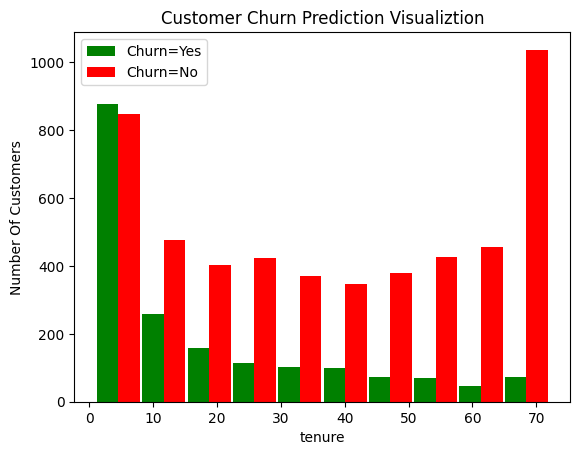

In [14]:
tenure_churn_no = df1[df1.Churn=='No'].tenure
tenure_churn_yes = df1[df1.Churn=='Yes'].tenure

plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend();

* Observing the graph, it's apparent that customers with longer tenure exhibit lower churn rates.





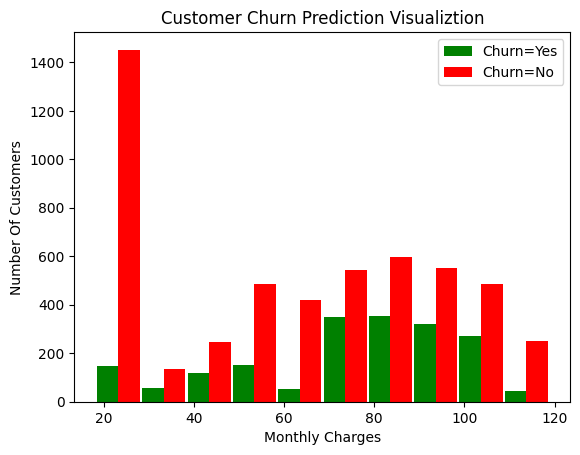

In [15]:
mc_churn_no = df1[df1.Churn=='No'].MonthlyCharges      
mc_churn_yes = df1[df1.Churn=='Yes'].MonthlyCharges      

plt.xlabel("Monthly Charges")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([mc_churn_yes, mc_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend();

#### Many of the columns are yes, no etc. Let's print unique values in object columns to see data values

In [16]:
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}') 

In [17]:
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


#### Some of the columns have no internet service or no phone service, that can be replaced with a simple No

In [18]:
df1.replace('No internet service','No',inplace=True)
df1.replace('No phone service','No',inplace=True)

C:\Users\omraj\AppData\Local\Temp\ipykernel_6264\2045096646.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No internet service','No',inplace=True)
C:\Users\omraj\AppData\Local\Temp\ipykernel_6264\2045096646.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No phone service','No',inplace=True)


In [19]:
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


**Transforming "Yes" to 1 and "No" to 0 :** we can express it as assigning binary values: 1 indicates "Yes" and 0 represents "No".

In [20]:
# as there are only 2 different values there is no need of OneHot encoding!
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    df1[col].replace({'Yes': 1,'No': 0},inplace=True)

C:\Users\omraj\AppData\Local\Temp\ipykernel_6264\75064592.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col].replace({'Yes': 1,'No': 0},inplace=True)


In [21]:
for col in df1:
    print(f'{col}: {df1[col].unique()}') 

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [22]:
# assining 1 for female and 0 for male.
df1['gender'].replace({'Female':1,'Male':0},inplace=True)

C:\Users\omraj\AppData\Local\Temp\ipykernel_6264\3299807316.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['gender'].replace({'Female':1,'Male':0},inplace=True)


In [23]:
df1.gender.unique()

array([1, 0], dtype=int64)

#### One hot encoding for categorical columns



In [24]:
df2 = pd.get_dummies(data=df1, columns=['InternetService','Contract','PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [25]:
df2.head(5)


gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       1              0        1           0       1             0   
1       0              0        0           0      34             1   
2       0              0        0           0       2             1   
3       0              0        0           0      45             0   
4       1              0        0           0       2             1   

   MultipleLines  OnlineSecurity  OnlineBackup  DeviceProtection  ...  \
0              0               0             1                 0  ...   
1              0               1             0                 1  ...   
2              0               1             1                 0  ...   
3              0               1             0                 1  ...   
4              0               0             0                 0  ...   

   InternetService_DSL  InternetService_Fiber optic  InternetService_No  \
0                 True                        False               False   
1                 True                        False               False   
2                 True                        False               False   
3                 True                        False               False   
4                False                         True               False   

   Contract_Month-to-month  Contract_One year  Contract_Two year  \
0                     True              False              False   
1                    False               True              False   
2                     True              False              False   
3                    False               True              False   
4                     True              False              False   

   PaymentMethod_Bank transfer (automatic)  \
0                                    False   
1                                    False   
2                                    False   
3                                     True   
4                                    False   

   PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                  False                            True   
1                                  False                           False   
2                                  False                           False   
3                                  False                           False   
4                                  False                            True   

   PaymentMethod_Mailed check  
0                       False  
1                        True  
2                        True  
3                       False  
4                       False  

[5 rows x 27 columns]

In [26]:
df2.shape

(7032, 27)

In [27]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                           bool
InternetService_Fiber optic                   bool
InternetService_No             

### Scaling: 
scaling methods include Min-Max scaling, where values are transformed to a specified range (usually 0 to 1), and z-score normalization, which standardizes values to have a mean of 0 and a standard deviation of 1.

In [28]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [29]:
for col in df2:
    print(f'{col}: {df2[col].unique()}')

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [

#### Train test split:
train-test split is a process of dividing a dataset into two separate sets: one for training the model and the other for evaluating its performance.





In [30]:
#create x feature
X = df2.drop('Churn',axis='columns')
#create Y feature
y = df2['Churn']

#Data splitting 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [31]:
X_train.shape

(5625, 26)

In [32]:
y_train.shape


(5625,)

In [33]:
X_train[:10]

gender  SeniorCitizen  Partner  Dependents    tenure  PhoneService  \
5664       1              1        0           0  0.126761             1   
101        1              0        1           1  0.000000             1   
2621       0              0        1           0  0.985915             1   
392        1              1        0           0  0.014085             1   
1327       0              0        1           0  0.816901             1   
3607       1              0        0           0  0.169014             1   
2773       0              0        1           0  0.323944             0   
1936       1              0        1           0  0.704225             1   
5387       0              0        0           0  0.042254             0   
4331       0              0        0           0  0.985915             1   

      MultipleLines  OnlineSecurity  OnlineBackup  DeviceProtection  ...  \
5664              0               0             0                 1  ...   
101               0               0             0                 0  ...   
2621              0               0             1                 1  ...   
392               0               0             0                 0  ...   
1327              1               0             0                 1  ...   
3607              0               1             0                 0  ...   
2773              0               0             0                 1  ...   
1936              0               1             1                 0  ...   
5387              0               0             0                 0  ...   
4331              1               0             0                 0  ...   

      InternetService_DSL  InternetService_Fiber optic  InternetService_No  \
5664                False                         True               False   
101                 False                        False                True   
2621                 True                        False               False   
392                  True                        False               False   
1327                False                         True               False   
3607                 True                        False               False   
2773                 True                        False               False   
1936                 True                        False               False   
5387                 True                        False               False   
4331                False                        False                True   

      Contract_Month-to-month  Contract_One year  Contract_Two year  \
5664                     True              False              False   
101                      True              False              False   
2621                    False              False               True   
392                      True              False              False   
1327                    False               True              False   
3607                    False               True              False   
2773                     True              False              False   
1936                    False               True              False   
5387                     True              False              False   
4331                    False              False               True   

      PaymentMethod_Bank transfer (automatic)  \
5664                                    False   
101                                     False   
2621                                    False   
392                                     False   
1327                                     True   
3607                                    False   
2773                                    False   
1936                                     True   
5387                                    False   
4331                                     True   

      PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
5664                                   True                           Fa

### Build a model (ANN) in tensorflow/keras

In [34]:
#import tenserflow
import tensorflow as tf
from tensorflow import keras

#Building model
model = keras.Sequential([
    keras.layers.Dense(26, input_shape=(26,), activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

#Compiling a model.
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

#traning model
model.fit(X_train, y_train, epochs=100)

Epoch 1/100


C:\Users\omraj\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 894us/step - accuracy: 0.7000 - loss: 0.5692
Epoch 2/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 861us/step - accuracy: 0.7829 - loss: 0.4488
Epoch 3/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 891us/step - accuracy: 0.7975 - loss: 0.4213
Epoch 4/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 958us/step - accuracy: 0.8058 - loss: 0.4067
Epoch 5/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 966us/step - accuracy: 0.8036 - loss: 0.4181
Epoch 6/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 826us/step - accuracy: 0.8010 - loss: 0.4184
Epoch 7/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 770us/step - accuracy: 0.8103 - loss: 0.4098
Epoch 8/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 771us/step - accuracy: 0.8109 - loss: 0.3968
Epoch 9/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 745us/step - accuracy: 0.8039 - loss: 0.4120
Epoch 10/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 845us/step - accuracy: 0.8133 - loss: 0.4045
Epoch 11/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 826us/step - accuracy: 0.8089 - loss: 0.4030
Epoch 12/100
176/176 ━━━━━━━━━━

176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 969us/step - accuracy: 0.8108 - loss: 0.3939
Epoch 68/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 817us/step - accuracy: 0.8252 - loss: 0.3756
Epoch 69/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 883us/step - accuracy: 0.8200 - loss: 0.3839
Epoch 70/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 763us/step - accuracy: 0.8252 - loss: 0.3735
Epoch 71/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 762us/step - accuracy: 0.8211 - loss: 0.3838
Epoch 72/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 756us/step - accuracy: 0.8196 - loss: 0.3840
Epoch 73/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 794us/step - accuracy: 0.8343 - loss: 0.3648
Epoch 74/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 773us/step - accuracy: 0.8170 - loss: 0.3851
Epoch 75/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 748us/step - accuracy: 0.8178 - loss: 0.3878
Epoch 76/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 791us/step - accuracy: 0.8213 - loss: 0.3774
Epoch 77/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 808us/step - accuracy: 0.8104 - loss: 0.3954
Epoch 78/100
176/176 ━━

In [35]:
model.evaluate(X_test, y_test)

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 719us/step - accuracy: 0.7939 - loss: 0.4421


[0.45815038681030273, 0.7860696315765381]

In [36]:
yp = model.predict(X_test)
yp[:5]

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[0.37854666],
       [0.39411256],
       [0.02343153],
       [0.7894176 ],
       [0.3527408 ]], dtype=float32)

In [37]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [38]:
y_pred[:10]

[0, 0, 0, 1, 0, 1, 0, 0, 0, 0]

In [39]:
y_test[:10]

2660    0
744     0
5579    1
64      1
3287    1
816     1
2670    0
5920    0
1023    0
6087    0
Name: Churn, dtype: int64

In [40]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85       999
           1       0.66      0.55      0.60       408

    accuracy                           0.79      1407
   macro avg       0.74      0.72      0.73      1407
weighted avg       0.78      0.79      0.78      1407



Text(95.72222222222221, 0.5, 'Truth')

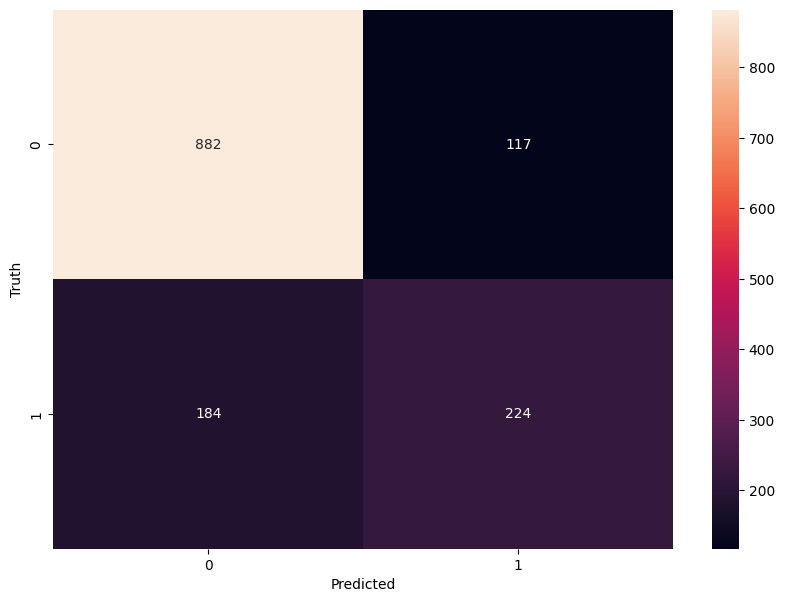

In [41]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# _______________________________________________________________ 

In [42]:
#import tenserflow
import tensorflow as tf
from tensorflow import keras

#Building model we have increases the hidden layers.
model = keras.Sequential([
    keras.layers.Dense(26, input_shape=(26,), activation='relu'),    # INPUT LAYER
    keras.layers.Dense(15, activation='relu'),                       # HIDDEN LAYER
    keras.layers.Dense(10, activation='relu'),                       # HIDDEN LAYER
    keras.layers.Dense(5, activation='relu'),                        # HIDDEN LAYER
    keras.layers.Dense(1, activation='sigmoid')                      # OUTPUT LAYER
])

#Compiling a model.
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

#traning model
model.fit(X_train, y_train, epochs=100)

Epoch 1/100


C:\Users\omraj\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 859us/step - accuracy: 0.6886 - loss: 0.6397
Epoch 2/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 884us/step - accuracy: 0.7776 - loss: 0.4311
Epoch 3/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 857us/step - accuracy: 0.8036 - loss: 0.4293
Epoch 4/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 885us/step - accuracy: 0.7966 - loss: 0.4230
Epoch 5/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 858us/step - accuracy: 0.8074 - loss: 0.4124
Epoch 6/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 900us/step - accuracy: 0.8037 - loss: 0.4126
Epoch 7/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 960us/step - accuracy: 0.8107 - loss: 0.4095
Epoch 8/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 928us/step - accuracy: 0.8065 - loss: 0.4109
Epoch 9/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 896us/step - accuracy: 0.8139 - loss: 0.4107
Epoch 10/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 901us/step - accuracy: 0.8074 - loss: 0.4094
Epoch 11/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 834us/step - accuracy: 0.8094 - loss: 0.4015
Epoch 12/100
176/176 ━━━━━━━━━━

176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 918us/step - accuracy: 0.8375 - loss: 0.3545
Epoch 68/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 893us/step - accuracy: 0.8340 - loss: 0.3584
Epoch 69/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 832us/step - accuracy: 0.8347 - loss: 0.3515
Epoch 70/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 818us/step - accuracy: 0.8318 - loss: 0.3634
Epoch 71/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 810us/step - accuracy: 0.8332 - loss: 0.3594
Epoch 72/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 860us/step - accuracy: 0.8282 - loss: 0.3645
Epoch 73/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 848us/step - accuracy: 0.8433 - loss: 0.3473
Epoch 74/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 882us/step - accuracy: 0.8268 - loss: 0.3621
Epoch 75/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 831us/step - accuracy: 0.8430 - loss: 0.3483
Epoch 76/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 824us/step - accuracy: 0.8313 - loss: 0.3551
Epoch 77/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 889us/step - accuracy: 0.8380 - loss: 0.3524
Epoch 78/100
176/176 ━━

In [43]:
model.evaluate(X_test, y_test)

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 979us/step - accuracy: 0.7827 - loss: 0.5097


[0.5264831185340881, 0.7732764482498169]

#### Accuracy

In [44]:
round((860+208)/(862+208+139+200),2)

0.76

#### Precision for 0 class. i.e. Precision for customers who did not churn

In [45]:
round(860/(860+200),2)

0.81

#### Precision for 1 class. i.e. Precision for customers who actually churned

In [46]:
round(208/(208+139),2)

0.6

[![GitHub](https://pbs.twimg.com/profile_images/1372304699601285121/5yBS6_3F_400x400.jpg)](https://github.com/OmrajeTambe)


[![LinkedIn](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRokEYt0yyh6uNDKL8uksVLlhZ35laKNQgZ9g&s)](https://www.linkedin.com/in/omraje-tambe)
